## Problem 1.a
Generate samples of cells with 100 growth and 100 starving cells. Represent data as a matrix and plot it.

In [3]:
import numpy as np
import copy

class Vector: 
    def __init__(self, g1, g2, g3, s1, s2, s3): 
        self.g1 = g1
        self.g2 = g2
        self.g3 = g3
        self.s1 = s1
        self.s2 = s2
        self.s3 = s3
    
    def __str__(self):
        return "{}, {}, {}, {}, {}, {}".format(self.g1, self.g2, self.g3, self.s1, self.s2, self.s3)
        
def sample(mean_gene, mean_state, state): 
    g1, g2, g3, s1, s2, s3 = 0, 0, 0, 0, 0, 0
    if state == 0:
        g1 = np.random.poisson(mean_gene.g1)
        g2 = np.random.poisson(mean_gene.g2)
        g3 = np.random.poisson(mean_gene.g3)
    else: 
        s1 = np.random.poisson(mean_state.s1)
        s2 = np.random.poisson(mean_state.s2)
        s3 = np.random.poisson(mean_state.s3)
    return g1, g2, g3, s1, s2, s3

mean_gene = Vector(100, 125, 130, 0, 0, 0)
mean_state = Vector(0, 0, 0, 20, 30, 40)
cells = []
for i in range(100): 
    tmp = Vector(0, 0, 0, 0, 0, 0)
    tmp.g1, tmp.g2, tmp.g3, tmp.s1, tmp.s2, tmp.s3 = sample(mean_gene, mean_state, 0)
    cells.append(copy.copy(tmp))

for i in range(100):
    tmp = Vector(0, 0, 0, 0, 0, 0)
    tmp.g1, tmp.g2, tmp.g3, tmp.s1, tmp.s2, tmp.s3 = sample(mean_gene, mean_state, 1)
    cells.append(copy.copy(tmp))

In [4]:
mtx = np.array([[0],[0],[0],[0],[0],[0]])
for cell in cells: 
    c = np.array([[cell.g1], [cell.g2], [cell.g3], [cell.s1], [cell.s2], [cell.s3]])
    mtx = np.append(mtx, c.copy(), axis=1)
mtx = np.delete(mtx, 0, axis=1)
print(mtx)

[[ 99  97  91 ...   0   0   0]
 [124 136 147 ...   0   0   0]
 [152 152 135 ...   0   0   0]
 [  0   0   0 ...  16  16  21]
 [  0   0   0 ...  34  25  27]
 [  0   0   0 ...  35  47  32]]


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = sns.heatmap(mtx)
plt.show()

<Figure size 640x480 with 2 Axes>

## Problem 1.b 
Mean center the data and calculate the mean centered, gene-gene covariance matrix. 

In [6]:
mean_center = mtx.copy()
for row in mean_center: 
    mean = np.mean(row)
    for i in range(len(row)): 
        row[i] -= mean
print(mean_center)

[[ 48  46  40 ... -50 -50 -50]
 [ 60  72  83 ... -63 -63 -63]
 [ 87  87  70 ... -64 -64 -64]
 [ -9  -9  -9 ...   6   6  11]
 [-15 -15 -15 ...  18   9  11]
 [-20 -20 -20 ...  14  26  11]]


In [7]:
gene_cov = (1 / (len(mean_center) - 1)) * np.dot(mean_center , mean_center.transpose())
print(gene_cov)

[[102264.  125603.8 128652.2 -18668.8 -29158.  -39394. ]
 [125603.8 159953.6 162117.8 -23407.2 -36546.6 -49379.8]
 [128652.2 162117.8 168693.6 -24006.8 -37506.8 -50670.4]
 [-18668.8 -23407.2 -24006.8   3941.6   5447.    7366.4]
 [-29158.  -36546.6 -37506.8   5447.    9174.2  11436.2]
 [-39394.  -49379.8 -50670.4   7366.4  11436.2  16173. ]]


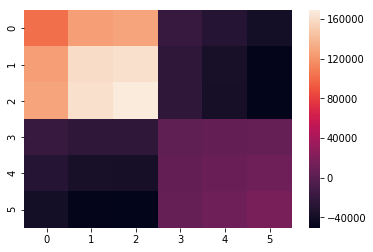

In [8]:
fig = sns.heatmap(gene_cov)
plt.show()

## Problem 1.c 
Find the eigenvectors and eigenvalues of the gene-gene covariance matrix and display them

In [9]:
eigv, eigvec = np.linalg.eig(gene_cov)
eigvec = np.asarray(eigvec)
eigvec1 = eigvec[:,0]
eigvec2 = eigvec[:,1]
print(eigvec1)
print(eigvec2)

[ 0.4704262   0.59141161  0.60712614 -0.08740958 -0.13655701 -0.18450232]
[-0.77092505 -0.00454604  0.6323951   0.02718899  0.0412758   0.05733584]


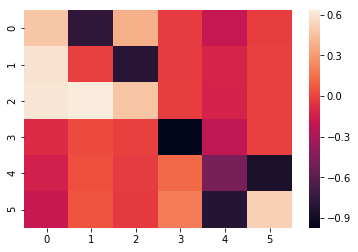

In [10]:
sns.heatmap(eigvec)

We can see that the eigenvectors mirror the structure of the gene expression programs. On the far left of the heatmap, we see the first eigenvector, which separates the gene expression into growth vs starving cells. Looking at the values in the eigenvector, we also see that the first three are positive while the last three are negative. The second eigenvector has more nuanced information, so we see that there is heterogeneity in the data. 

## Problem 1.d
Project the mean centered data along the first and second eigenvector and plot a scatterplot.

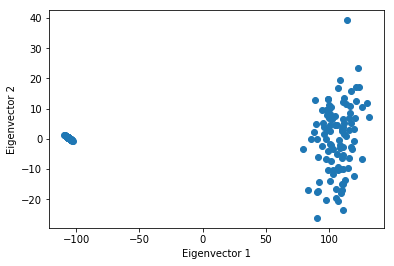

In [11]:
x = []
y = []
for i in range(len(mean_center[0])): 
    x.append(np.dot(eigvec1, mean_center[:,i]))
    y.append(np.dot(eigvec2, mean_center[:,i]))

plt.xlabel("Eigenvector 1")
plt.ylabel("Eigenvector 2")
plt.scatter(x, y)

## Problem 2.a
Generate synthetic growth and starvation data, plot the gene-gene covariance matrix and raw data heatmap.

In [12]:
class Vector2: 
    def __init__(self, g1, g2, g3, g4, s1, s2, s3, s4): 
        self.g1 = g1
        self.g2 = g2
        self.g3 = g3
        self.g4 = g4
        self.s1 = s1
        self.s2 = s2
        self.s3 = s3
        self.s4 = s4
    
    def __str__(self):
        return "{}, {}, {}, {}, {}, {}".format(self.g1, self.g2, self.g3, self.g4, 
                                               self.s1, self.s2, self.s3, self.s4)
def sample2(mean_gene, mean_state, state): 
    g1, g2, g3, g4, s1, s2, s3, s4 = 0, 0, 0, 0, 0, 0, 0, 0
    if state == 0:
        g1 = np.random.poisson(mean_gene.g1)
        g2 = np.random.poisson(mean_gene.g2)
        g3 = np.random.poisson(mean_gene.g3)
        g4 = np.random.poisson(mean_gene.g4)
        s1 = np.random.poisson(mean_gene.s1)
        s2 = np.random.poisson(mean_gene.s2)
        s3 = np.random.poisson(mean_gene.s3)
        s4 = np.random.poisson(mean_gene.s4)
    else:
        g1 = np.random.poisson(mean_state.g1)
        g2 = np.random.poisson(mean_state.g2)
        g3 = np.random.poisson(mean_state.g3)
        g4 = np.random.poisson(mean_state.g4)
        s1 = np.random.poisson(mean_state.s1)
        s2 = np.random.poisson(mean_state.s2)
        s3 = np.random.poisson(mean_state.s3)
        s4 = np.random.poisson(mean_state.s4)
    return g1, g2, g3, g4, s1, s2, s3, s4

mean_gene2 = Vector2(60, 0, 80, 10, 50, 50, 0, 0)
mean_state2 = Vector2(0, 30, 10, 0, 30, 50, 50, 10)
cells2 = []

for i in range(100): 
    tmp = Vector2(0, 0, 0, 0, 0, 0, 0, 0)
    tmp.g1, tmp.g2, tmp.g3, tmp.g4, tmp.s1, tmp.s2, tmp.s3, tmp.s4 = sample2(
                                                                     mean_gene2, mean_state2, 0)
    cells2.append(copy.copy(tmp))

for i in range(100):
    tmp = Vector2(0, 0, 0, 0, 0, 0, 0, 0)
    tmp.g1, tmp.g2, tmp.g3, tmp.g4, tmp.s1, tmp.s2, tmp.s3, tmp.s4 = sample2(
                                                                    mean_gene2, mean_state2, 1)
    cells2.append(copy.copy(tmp))

In [13]:
mtx2 = np.array([[0],[0],[0],[0],[0],[0], [0], [0]])
for cell in cells2: 
    c = np.array([[cell.g1], [cell.g2], [cell.g3], [cell.g4], 
                  [cell.s1], [cell.s2], [cell.s3], [cell.s4]])
    mtx2 = np.append(mtx2, c.copy(), axis=1)
mtx2 = np.delete(mtx2, 0, axis=1)
print(mtx2)

[[63 68 55 ...  0  0  0]
 [ 0  0  0 ... 24 30 32]
 [78 72 78 ...  7 13  9]
 ...
 [51 37 47 ... 47 40 57]
 [ 0  0  0 ... 54 46 52]
 [ 0  0  0 ... 10 10 10]]


In [14]:
print(mtx2.shape)

(8, 200)


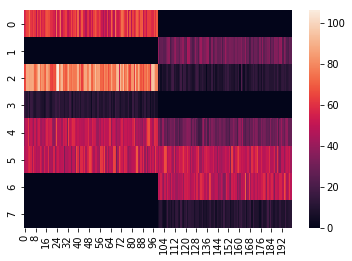

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = sns.heatmap(mtx2)
plt.show()

In [74]:
mean_center2 = mtx2.copy()
for row in mean_center2: 
    mean = np.mean(row)
    for i in range(len(row)): 
        row[i] -= mean
print(mean_center2)

[[ 24  28  34 ... -30 -30 -30]
 [-15 -15 -15 ...   5  12  10]
 [ 19  21  43 ... -32 -30 -31]
 ...
 [ -4  -4   0 ...  -1   3  -7]
 [-24 -24 -24 ...  25  36  24]
 [ -5  -5  -5 ...   4   5   5]]


In [81]:
gene_cov2 = (1 / (len(mean_center2) - 1)) * np.dot(mean_center2 , mean_center2.transpose())
print(gene_cov2)

[[ 2.58130000e+04 -1.24821429e+04  2.85900000e+04  4.11714286e+03
   8.00742857e+03  9.17142857e+01 -2.03477143e+04 -3.85642857e+03]
 [-1.24821429e+04  6.69657143e+03 -1.41145714e+04 -2.05714286e+03
  -3.98114286e+03 -1.20000000e+01  1.01788571e+04  1.89685714e+03]
 [ 2.85900000e+04 -1.41145714e+04  3.36981429e+04  4.71828571e+03
   9.05342857e+03  1.14285714e+01 -2.30790000e+04 -4.35100000e+03]
 [ 4.11714286e+03 -2.05714286e+03  4.71828571e+03  8.08285714e+02
   1.31600000e+03 -2.91428571e+01 -3.35414286e+03 -6.35000000e+02]
 [ 8.00742857e+03 -3.98114286e+03  9.05342857e+03  1.31600000e+03
   3.54314286e+03  3.00000000e+01 -6.45785714e+03 -1.23214286e+03]
 [ 9.17142857e+01 -1.20000000e+01  1.14285714e+01 -2.91428571e+01
   3.00000000e+01  1.34628571e+03 -9.34285714e+01 -5.32857143e+01]
 [-2.03477143e+04  1.01788571e+04 -2.30790000e+04 -3.35414286e+03
  -6.45785714e+03 -9.34285714e+01  1.72478571e+04  3.17842857e+03]
 [-3.85642857e+03  1.89685714e+03 -4.35100000e+03 -6.35000000e+02
  -

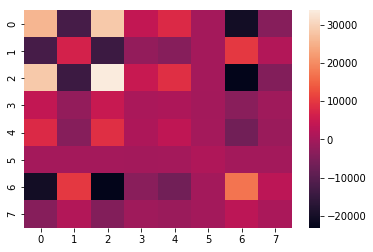

In [82]:
fig = sns.heatmap(gene_cov2)
plt.show()

## Problem 2.b
Calculate the eigenvalues and eigenvectors and plot.

In [77]:
eigv2, eigvec2 = np.linalg.eig(gene_cov2)
eigvec2 = np.asarray(eigvec2)
eigvec21 = eigvec2[:,0]
eigvec22 = eigvec2[:,1]
print(eigvec21)
print(eigvec22)

[ 0.5456044  -0.27014838  0.62357918  0.08921803  0.17395549  0.00130054
 -0.44197859 -0.08317187]
[-0.08482981  0.02709912  0.20853802  0.02936264 -0.07300679 -0.95961721
  0.13786984  0.05015963]


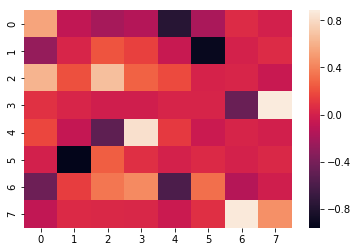

In [78]:
sns.heatmap(eigvec2)

Since the gene expression programs are no longer orthogonal and share genes, we see that the eigenvectors are more mixed. We see in the first eigenvector that the genes at index 1, 6, and 7 are more frequently expressed by the starvation cells, which makes sense considering the vectors for growth and starvation states. 

## Problem 2.c
Implement non-negative matrix factorization (nnmf) using the multiplicative update rule for inner dimension k= 1,2,3.  Plot a heat map of H and W.

In [23]:
# create base matrix with random values
Hs = []
Ws = []
for k in range(2, 4): 
    W = np.random.rand(8, k)
    H = np.random.rand(k, 200)
    prev_error = 10000
    curr_error = 10000
    i = 0
    while(curr_error > 0.001):
        wTd = np.dot(W.transpose(), mtx2)
        wTwh = np.dot(np.dot(W.transpose(), W), H)
        print(H.shape, np.divide(wTd,wTwh).shape)
        H = H*np.divide(wTd,wTwh)
        dhT = np.dot(mtx2, H.transpose())
        whhT = np.dot(np.dot(W, H), H.transpose())

        #print(W)
        W = W*np.divide(dhT,whhT)
        #print(W)
        if i == 0: 
            i = 1
            prev_error = np.linalg.norm(mtx2 - np.dot(W, H))
        else:
            curr_error = np.linalg.norm(mtx2 - np.dot(W, H))
            if prev_error - curr_error < 0.0001:
                print("k: ", k , ", errors: ", curr_error, prev_error)
                Ws.append(W)
                Hs.append(H)
                break
            else:
                prev_error = curr_error

(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (2, 200)
(2, 200) (

(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (

(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (

(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (

(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (3, 200)
(3, 200) (

In [15]:
print(mtx2.shape)

(8, 200)


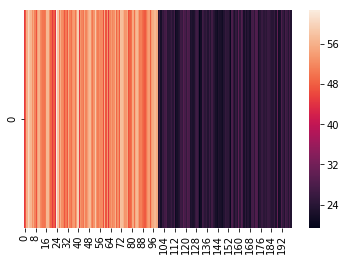

In [203]:
sns.heatmap(Hs[0])

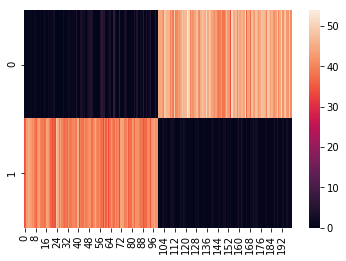

In [125]:
sns.heatmap(Hs[1])

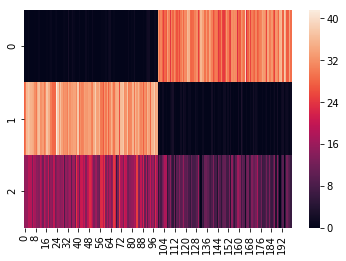

In [126]:
sns.heatmap(Hs[2])

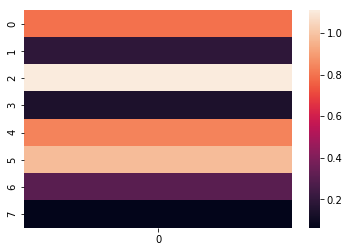

In [127]:
sns.heatmap(Ws[0])

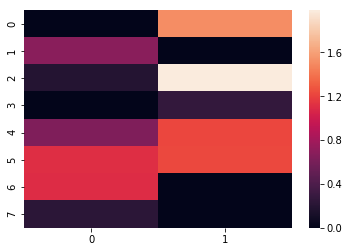

In [128]:
sns.heatmap(Ws[1])

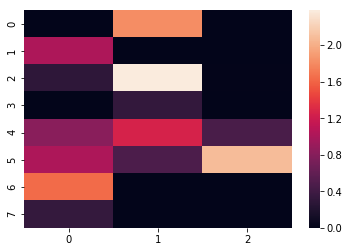

In [129]:
sns.heatmap(Ws[2])

## Problem 3.a
Perform PCA on the data by calculating the mean centered gene-gene covariance matrix and finding its eigenvectors and eigenvalues.  Plot a heat map of the covariance matrix, and plot the first 20 eigenvalues arranged in decreasing order.

In [185]:
import csv
reader = csv.reader(open("pbmc_data_matt.csv"), delimiter=",")
x = list(reader)
result = np.log(np.array(x).astype("float")+1.0)
print(result)

[[2.85128437 2.85128437 2.83749827 ... 0.         0.         0.        ]
 [2.6854637  2.6854637  2.82036647 ... 0.         0.         0.        ]
 [2.80208684 2.80208684 2.83802528 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Plot a heatmap of the log transformed data. 

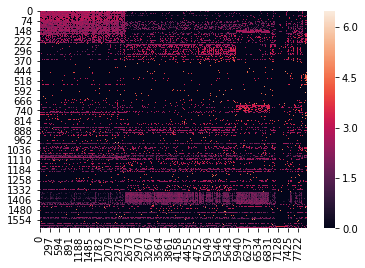

In [186]:
sns.heatmap(result)

In [187]:
mean_center3 = result.copy()
for row in mean_center3: 
    mean = np.mean(row)
    for i in range(len(row)): 
        row[i] -= mean
print(mean_center3)

[[ 1.90390553  1.90390553  1.89011943 ... -0.94737884 -0.94737884
  -0.94737884]
 [ 1.80742587  1.80742587  1.94232864 ... -0.87803783 -0.87803783
  -0.87803783]
 [ 1.85270193  1.85270193  1.88864036 ... -0.94938492 -0.94938492
  -0.94938492]
 ...
 [-0.02132178 -0.02132178 -0.02132178 ... -0.02132178 -0.02132178
  -0.02132178]
 [-0.00519705 -0.00519705 -0.00519705 ... -0.00519705 -0.00519705
  -0.00519705]
 [-0.03027808 -0.03027808 -0.03027808 ... -0.03027808 -0.03027808
  -0.03027808]]


In [25]:
gene_cov3 = (1 / (len(mean_center3) - 1)) * np.dot(mean_center3 , mean_center3.transpose())
print(gene_cov3)

NameError: name 'mean_center3' is not defined

In [24]:
print(gene_cov3.shape)

NameError: name 'gene_cov3' is not defined

Plot the gene covariance matrix of the mean centered data. 

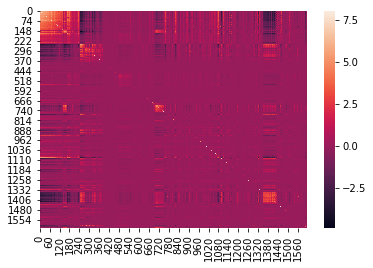

In [189]:
sns.heatmap(gene_cov3)

In [192]:
eigv3, eigvec3 = np.linalg.eig(gene_cov3)
eigvec3 = np.asarray(eigvec3)[:,:20]
eigvec3sort = eigvec3.copy()
eigvec3sort.sort()
eigvec3sort = eigvec3sort[::-1]
print(eigvec3sort)

[[-0.00654044 -0.00504489 -0.00377455 ...  0.00686047  0.007297
   0.01017436]
 [-0.00502656 -0.0012214  -0.00119563 ...  0.00158002  0.00160835
   0.00338261]
 [-0.00501116 -0.00465289 -0.0039724  ...  0.00243495  0.00384874
   0.00488683]
 ...
 [-0.03266814 -0.02349082 -0.02057472 ...  0.02495089  0.0270693
   0.07859093]
 [-0.03221015 -0.02926374 -0.01615673 ...  0.02282317  0.03906824
   0.08172881]
 [-0.02890638 -0.02606838 -0.01896066 ...  0.03638007  0.0592651
   0.07890488]]


Plot the sorted eigenvectors.

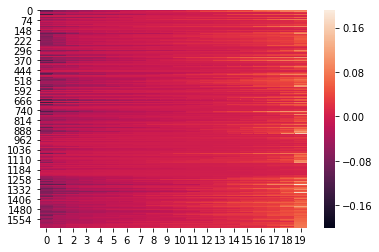

In [193]:
sns.heatmap(eigvec3sort)

## Problem 3.b
Project the data into the first two principal components and plot a scatter plot of this projection.

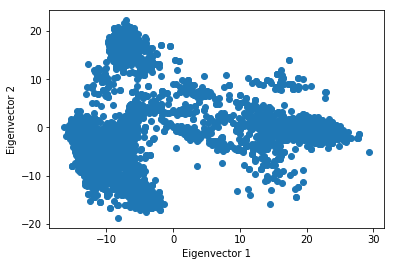

In [194]:
x = []
y = []
for i in range(len(mean_center3[0])): 
    x.append(np.dot(eigvec3[:,0], mean_center3[:,i]))
    y.append(np.dot(eigvec3[:,1], mean_center3[:,i]))

plt.xlabel("Eigenvector 1")
plt.ylabel("Eigenvector 2")
plt.scatter(x, y)

## Problem 3.c 
Project the data onto the first 3 principal components and plot a scatter plot. 

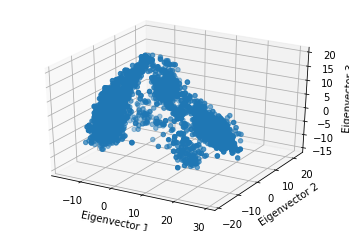

In [195]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = []
y = []
z = []
for i in range(len(mean_center3[0])): 
    x.append(np.dot(eigvec3[:,0], mean_center3[:,i]))
    y.append(np.dot(eigvec3[:,1], mean_center3[:,i]))
    z.append(np.dot(eigvec3[:,2], mean_center3[:,i]))

ax.scatter(x, y, z)
ax.set_xlabel('Eigenvector 1')
ax.set_ylabel('Eigenvector 2')
ax.set_zlabel('Eigenvector 3')
plt.show()

## Problem 3.d
Show a heatmap of the first 2 principal component vectors next to a heat map of the data matrix. 

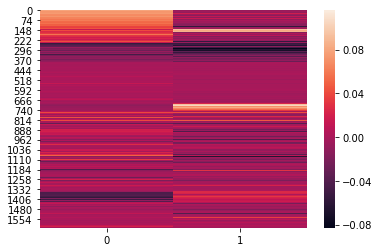

In [196]:
sns.heatmap(eigvec3[:,:2])

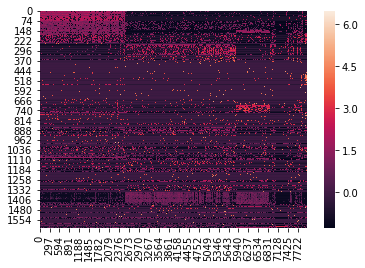

In [197]:
sns.heatmap(mean_center3)

I believe the PCs do capture some of the blocks in the data. For example, in the block on the top left, the colors in the first PC are similar to that in the data heatmap. This holds true for many of the more prominent bands of color in the data matrix, where a corresponding band shows up in the heatmap of the top 2 PCs. However, there is much more nuance in the data, as shown by the large amount of dark purple, which is not displayed in the heatmap of the first two PCs. 

## Problem 3.e

In [205]:
from sklearn.decomposition import NMF

Hs2 = []
Ws2 = []

for k in [4, 20, 40]:
    model = NMF(n_components=k, init="random")
    W = model.fit_transform(result)
    H = model.components_
    Hs2.append(H)
    Ws2.append(W)

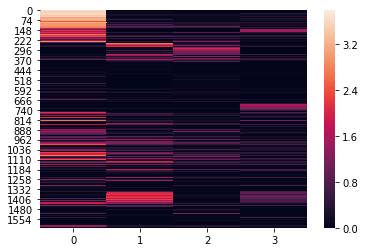

In [212]:
sns.heatmap(Ws2[0])

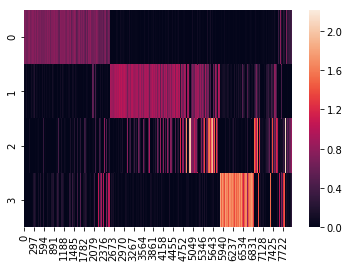

In [213]:
sns.heatmap(Hs2[0])

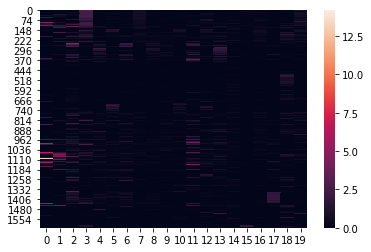

In [214]:
sns.heatmap(Ws2[1])

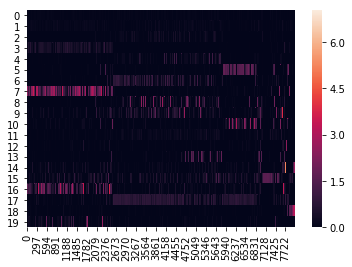

In [215]:
sns.heatmap(Hs2[1])

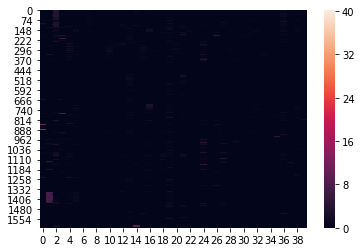

In [216]:
sns.heatmap(Ws2[2])

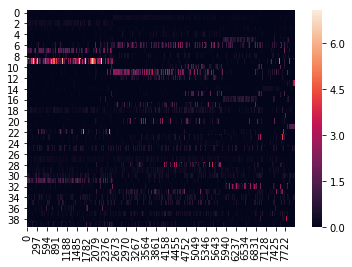

In [217]:
sns.heatmap(Hs2[2])

**Try a different replicate with Nonnegative Double Singular Value Decomposition (NNDSVD) initialization method.**

In [234]:
Hs3 = []
Ws3 = []

for k in [4, 20, 40]:
    model = NMF(n_components=k, init="nndsvd")
    W = model.fit_transform(result)
    H = model.components_
    Hs3.append(H)
    Ws3.append(W)

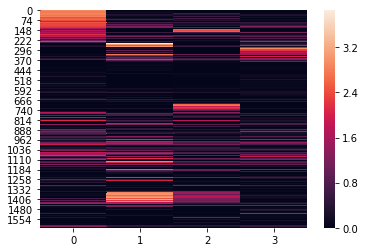

In [235]:
sns.heatmap(Ws3[0])

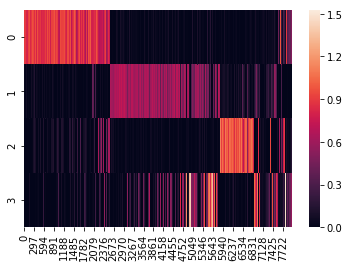

In [236]:
sns.heatmap(Hs3[0])

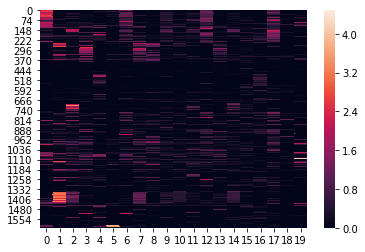

In [237]:
sns.heatmap(Ws3[1])

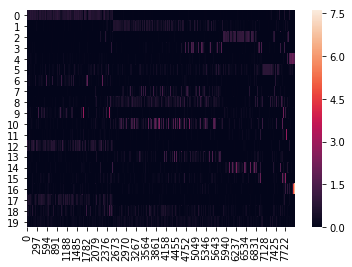

In [238]:
sns.heatmap(Hs3[1])

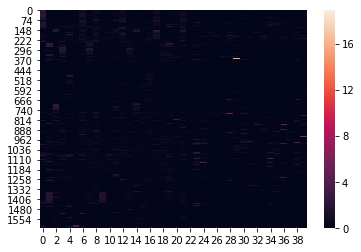

In [239]:
sns.heatmap(Ws3[2])

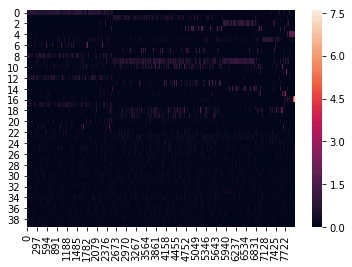

In [240]:
sns.heatmap(Hs3[2])

You capture the gene expression programs shown in the data, especially when you compare the heatmaps of the original data with the heatmaps of the H and W matrices. It is more prominent for W matrices with lower amount of k components, but the strong band of color from the top left of the heatmap is shown in both heatmaps of the gene data and the W matrix. As shown in the original heatmap of data, the heatmap is mostly dark with specks of color, and this pattern shows more when the number of components increases, where the heatmaps are mostly dark with small bands. 

## Problem 3.f
Look at the W matrix, for one of the W vectors select 5 genes with the top coefficient value. Write down their names and look up their function.

In [284]:
vec = np.ndarray.flatten(np.asmatrix(Ws3[0])[:,0])
print(vec)
vec = np.argsort(np.asarray(vec)[0])[-5:]
print(vec)

[[2.97189221 2.97403909 2.97409404 ... 0.02407223 0.01785744 0.00991145]]
[ 3  0  1  2 46]


In [285]:
import csv
titles = []
with open('PBMC_6_Gene_Names.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        titles.append(row[0])
for i in vec:
    print(titles[i])

TNFRSF4
HES4
ISG15
TNFRSF18
ST3GAL3


* TNFRSF4: The protein encoded by this gene has been shown to promote the expression of apoptosis inhibitors BCL2 and BCL2lL1/BCL2-XL, and thus suppresses apoptosis. Additionally, it plays a role in CD4+ T cell response, as well as in T cell-dependent B cell proliferation and differentiation. 
* HES4: This is a protein coding gene, where mutations may end up in severe neuro-developmental disorders/diseases. It is also involved in transcription factor binding and protein dimerization activity. 
* ISG15: The protein encoded by this gene is activated by interferon-alpha and interferon-beta. It is involved in several functions, most notably cell-to-cell signaling and antiviral activity during viral infections, where it is part of the immune response.
* TNFRSF18: This gene encodes a member of the TNF-receptor superfamily and has increased expression upon T-cell activation, and it is thought to play a key role in dominant immunological self-tolerance maintained regulatory T cells. It is also involved in the regulation of T-cell activation and programmed cell death. 
* ST3GAL3: The protein encoded by this gene is a type II membrane protein, where mutations in this gene have been associated with a form of autosomal recessive nonsymdromic cognitive disability as well as infantile epileptic encephalopathy. 

## Problem 3.g
Perform NNMF for k = 1 to k = 40, and plot the reconstruction error as a function of k.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


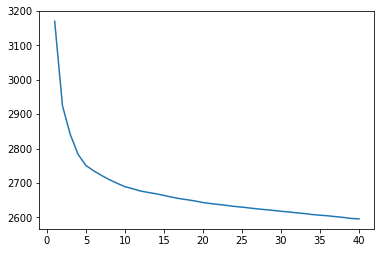

In [251]:
err = []
for k in range(1, 41): 
    model = NMF(n_components=k)
    print(k)
    W = model.fit_transform(result)
    H = model.components_
    err.append(model.reconstruction_err_)

k = np.arange(1, 41)
plt.plot(k, err)

It seems like as k grows larger, the reconstruction error decreases. However, the size of the decrease is getting smaller, as the function of k vs reconstruction error asymptotically tends towards a value slightly below 2600 in this graph. 

## Problem 3.h
In sklearn.decomposition.SparsePCA, the alpha stands for the sparsity controlling parameter. A higher alpha means the components will be sparser. 